<p align="center">
  <img src="chart_zoom.jpg" alt="chart_zoom">
</p>

Fraud doesn’t just cost money—it costs trust. As a key member of a financial compliance team, your mission is to uncover suspicious transactions that might otherwise slip through the cracks. With the stakes this high, your insights could be the difference between stopping fraud in its tracks or letting it go unnoticed.

In this project, you'll harness the power of IForest from pyod.models to detect anomalies in banking data. Your challenge: flag unusual transactions, summarize your findings, and deliver actionable insights that ensure trust, security, and efficiency in financial operations.

## Hints and Notes

- Ensure there are no missing values in the output DataFrame.
- Be sure to label the axes and legend clearly on the histogram to make the anomalies easily identifiable.

## The Data

You will work with a dataset containing information about financial transactions. Below is a summary of the key columns provided:

| **Column**              | **Description**                                                                                   |
|--------------------------|---------------------------------------------------------------------------------------------------|
| `TransactionID`          | A unique identifier for each transaction.                                                       |
| `TransactionAmount`      | The amount of money involved in the transaction (in USD).                                        |
| `TransactionDuration`    | Duration of the transaction (in seconds).                                                       |
| `AccountBalance`         | The balance of the account after the transaction was processed (in USD).                        |



In [52]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
transactions = pd.read_csv("transactions.csv")

# Isolate key columns
columns_to_display = ["TransactionID", "TransactionAmount", "TransactionDuration", "AccountBalance"]
transactions = transactions[columns_to_display]

# Display the first rows of the table
transactions.head()

,TransactionID,TransactionAmount,TransactionDuration,AccountBalance
0,TX000001,14.09,81,5112.21
1,TX000002,376.24,141,13758.91
2,TX000003,126.29,56,1122.35
3,TX000004,184.50,25,8569.06
4,TX000005,13.45,198,7429.40


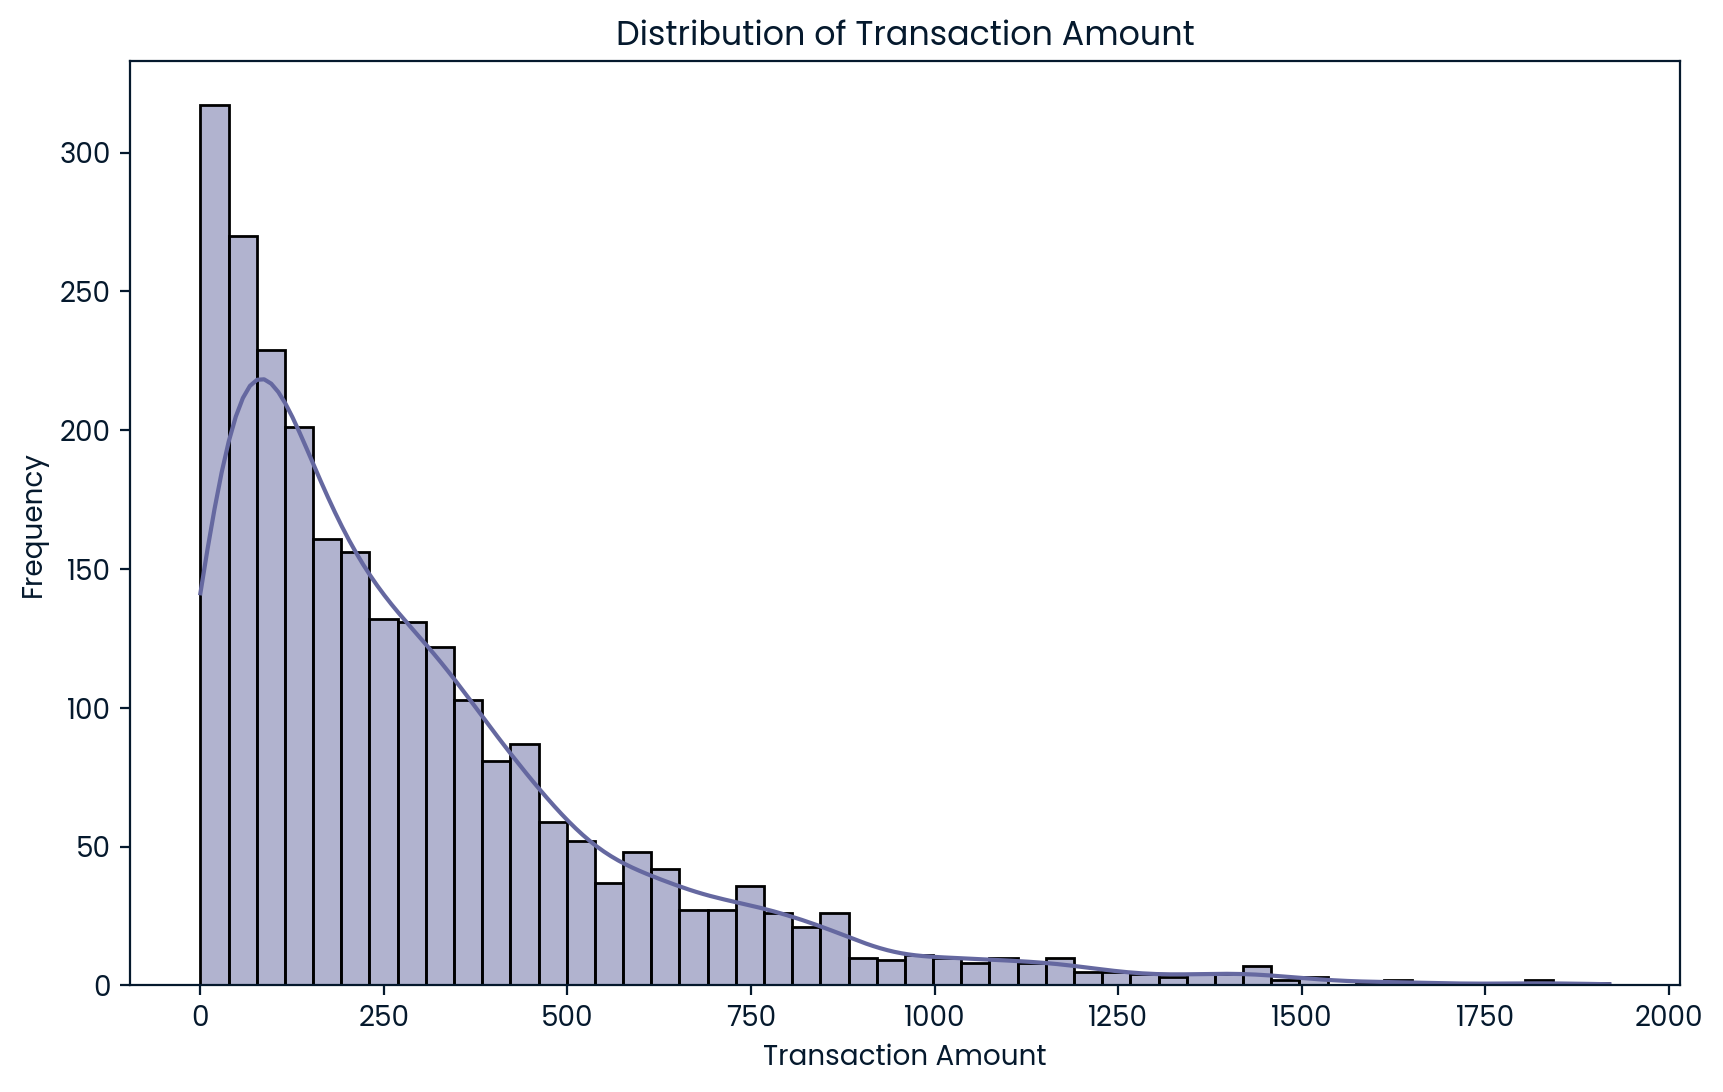

In [53]:
# Start coding here
# Use as many cells as you need
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions, x="TransactionAmount", bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [54]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05, random_state=42)
features = transactions[['TransactionAmount', 'TransactionDuration', 'AccountBalance']]
model.fit(features)
raw_anomaly_scores = model.decision_function(features)
transactions['Anomaly_Score'] = -raw_anomaly_scores

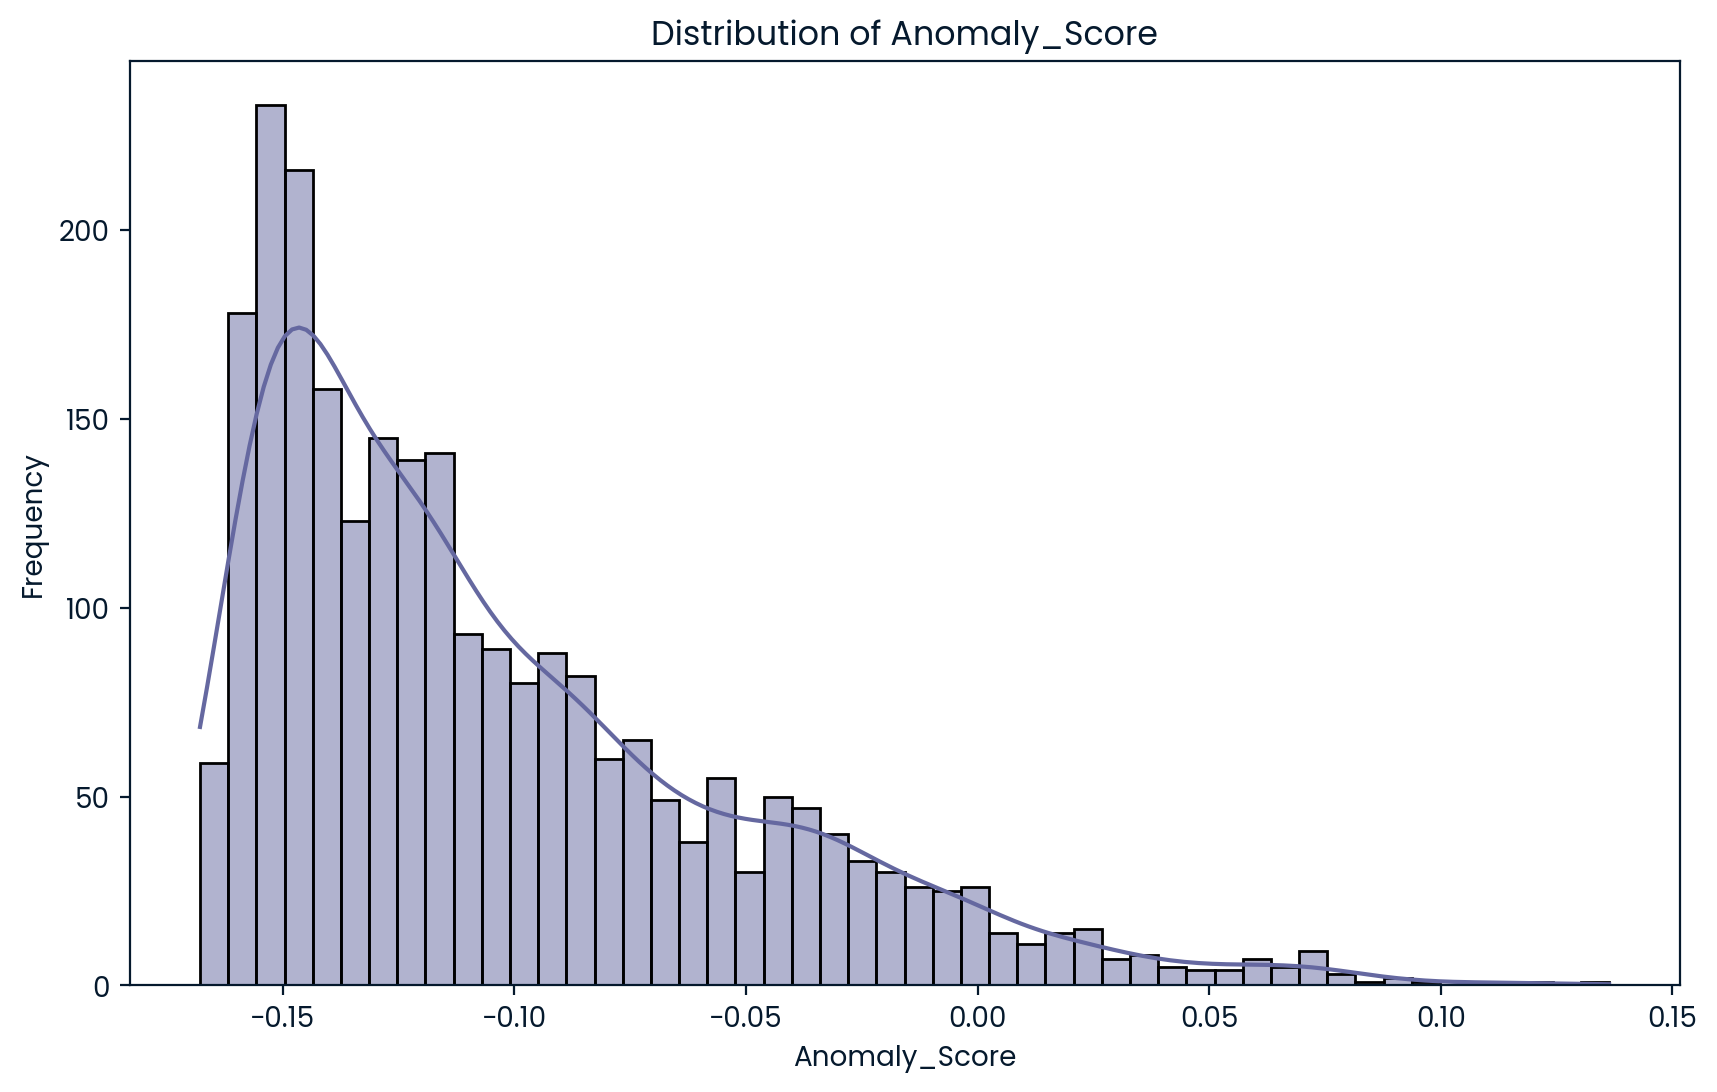

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions, x="Anomaly_Score", bins=50, kde=True)
plt.title('Distribution of Anomaly_Score')
plt.xlabel('Anomaly_Score')
plt.ylabel('Frequency')
plt.show()

In [56]:
# Calculate the number of anomalies (5% of total transactions)
num_anomalies = int(len(transactions) * 0.05)

# Sort by Anomaly_Score in descending order and get the index of the threshold
# The anomaly_scores were inverted, so higher is more anomalous.
threshold_score = transactions['Anomaly_Score'].nlargest(num_anomalies).iloc[-1]
transactions['Anomaly'] = (transactions['Anomaly_Score'] >= threshold_score).astype(int)

In [57]:
anomalies_summary = transactions[transactions['Anomaly'] == 1][['TransactionID', 'TransactionAmount', 'TransactionDuration', 'AccountBalance']]

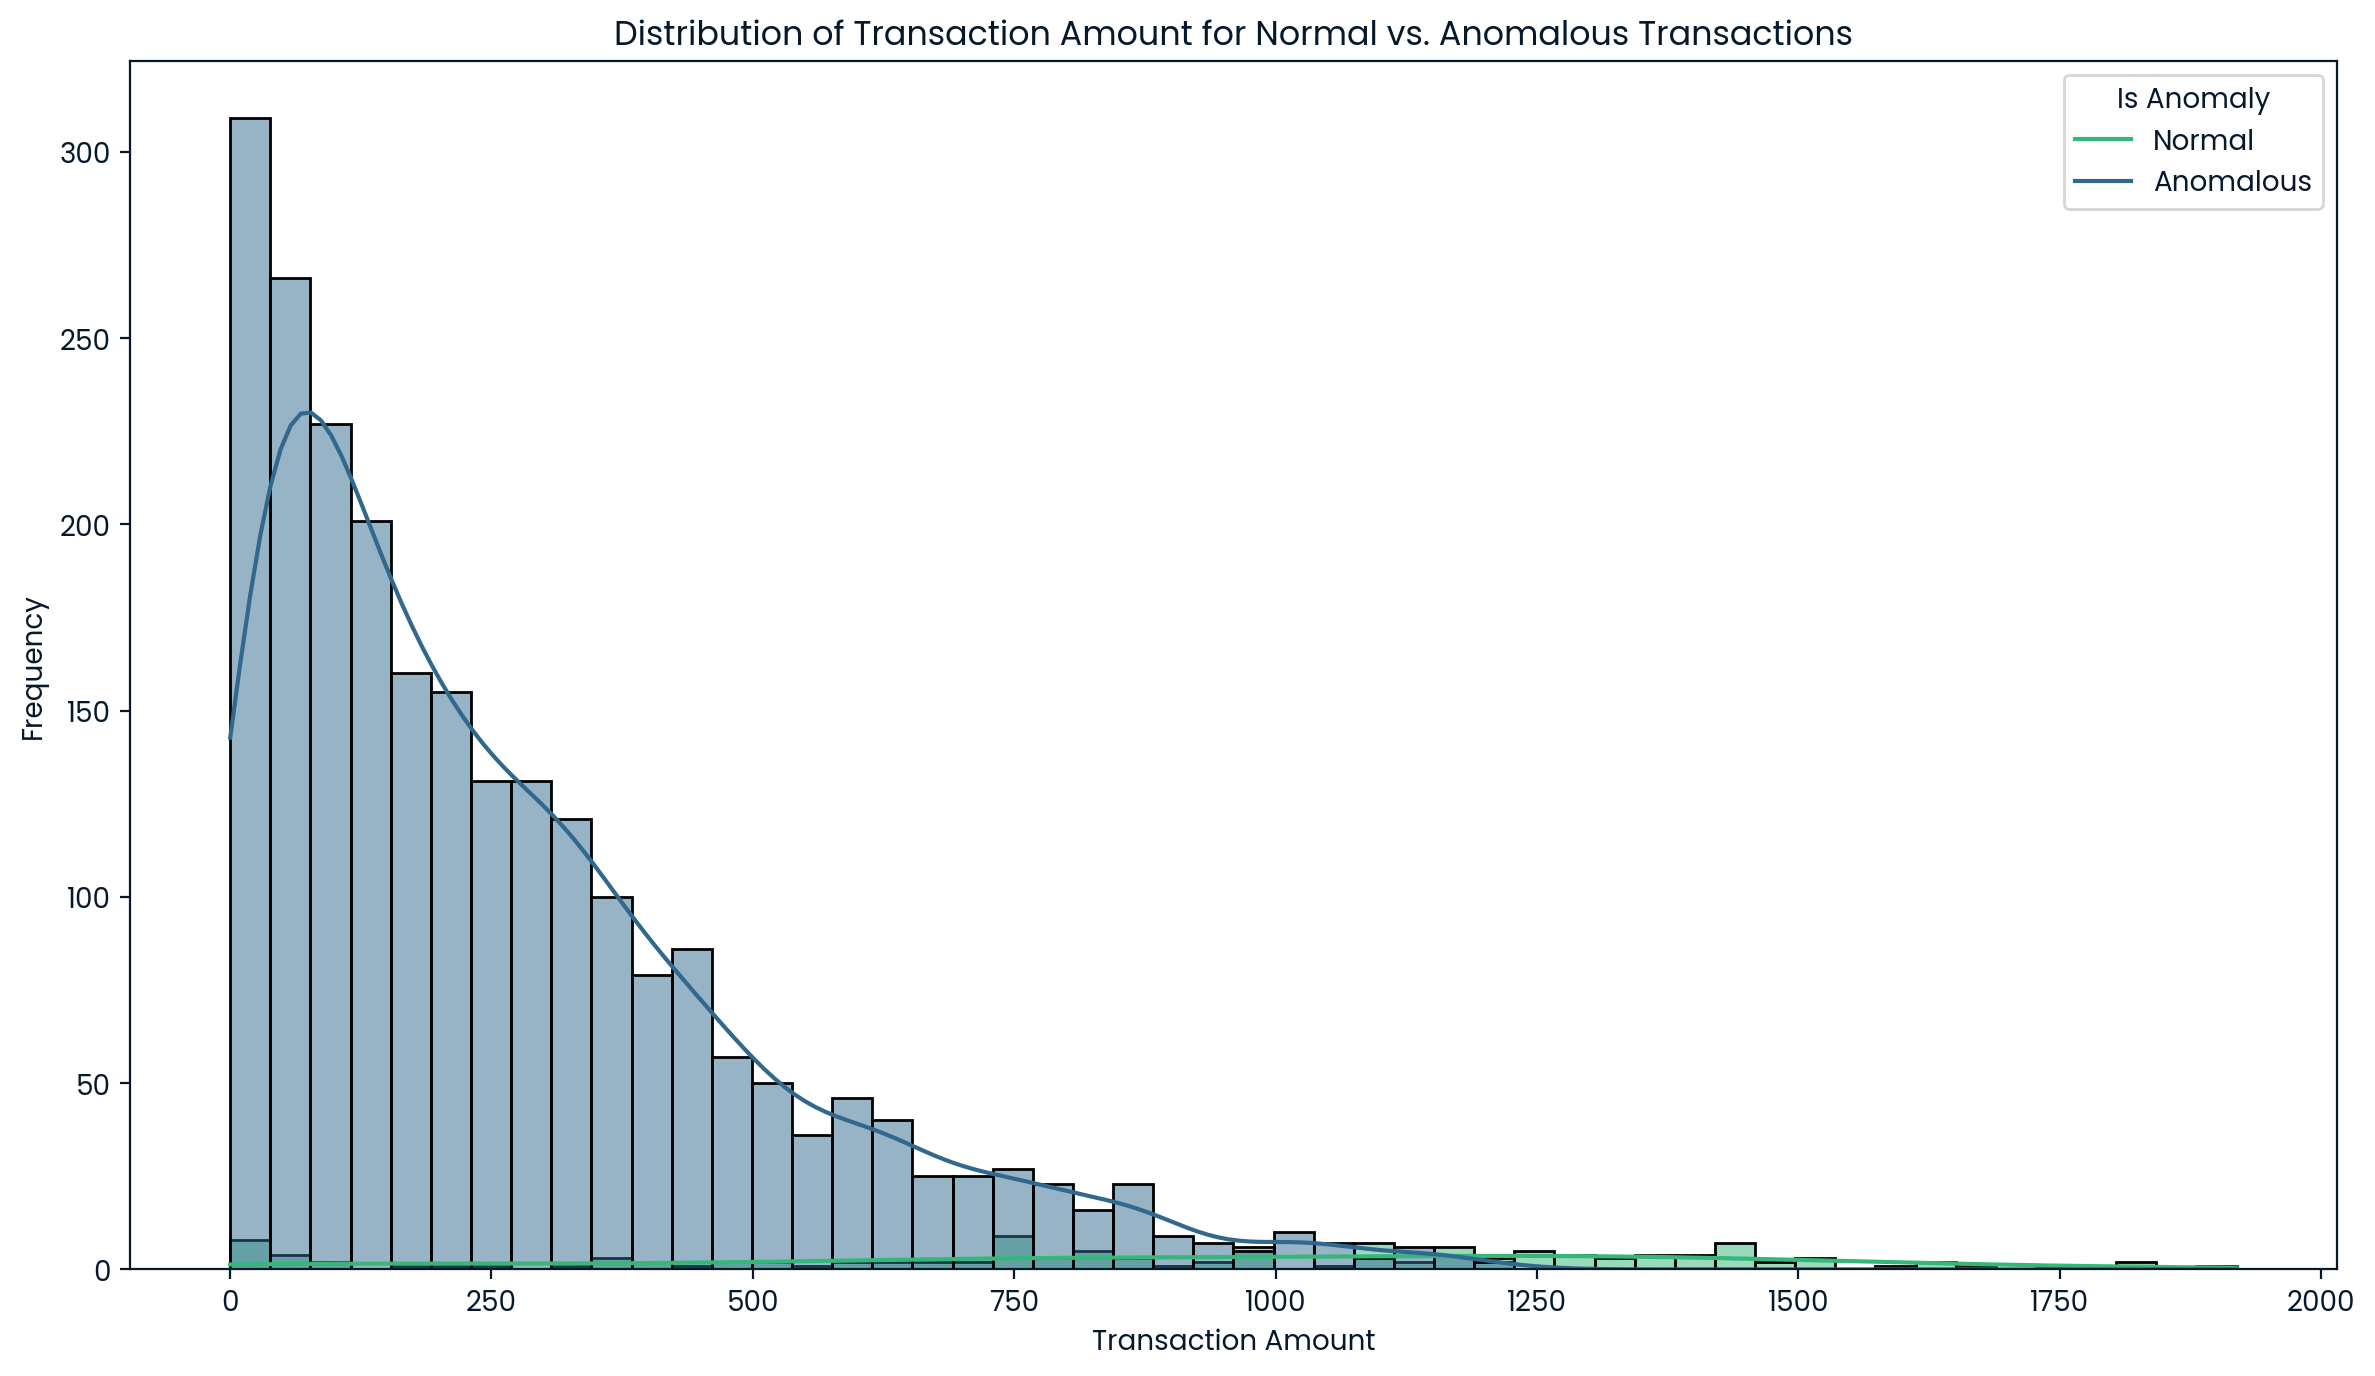

In [58]:
plt.figure(figsize=(12, 7)) 
sns.histplot(data=transactions, x="TransactionAmount", hue="Anomaly", bins=50, kde=True,
             palette="viridis", common_norm=False) 
plt.title('Distribution of Transaction Amount for Normal vs. Anomalous Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(title='Is Anomaly', labels=['Normal', 'Anomalous']) 
plt.tight_layout() 
plt.savefig("anomalies_histogram.png")
plt.show()